<a href="https://colab.research.google.com/github/kriskodes/Kris-Kodes-/blob/main/practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as prepro
import ipywidgets as widg

from IPython.display import display
from google.colab import widgets
from google.colab import output
from matplotlib import pylab
from six.moves import zip
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

# import data

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
-- 1 building_windows_float_processed
-- 2 building_windows_non_float_processed
-- 3 vehicle_windows_float_processed
-- 4 vehicle_windows_non_float_processed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps



In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data', header=None)
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [ ]:
names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Class']
data.columns = names
data = data.drop(columns = ['Id'])
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [ ]:
data['Class'].replace({1:"building_float",
                       2:"building_non_float",
                       3:"vehicle_float",
                       4:"vehicle_non_float",
                       5:"containers",
                       6:"tableware",
                       7:"headlamps"
                      }, inplace=True)
data.head(7)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,building_float
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,building_float
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,building_float
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,building_float
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,building_float
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,building_float
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,building_float


In [ ]:
for col in data.columns:
  fr = np.random.randint(5,10)/100
  data.loc[data.sample(frac=fr).index, col] = np.nan

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      201 non-null    float64
 1   Na      195 non-null    float64
 2   Mg      201 non-null    float64
 3   Al      197 non-null    float64
 4   Si      197 non-null    float64
 5   K       195 non-null    float64
 6   Ca      203 non-null    float64
 7   Ba      201 non-null    float64
 8   Fe      201 non-null    float64
 9   Class   197 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


# Data Vizualization

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      201 non-null    float64
 1   Na      195 non-null    float64
 2   Mg      201 non-null    float64
 3   Al      197 non-null    float64
 4   Si      197 non-null    float64
 5   K       195 non-null    float64
 6   Ca      203 non-null    float64
 7   Ba      201 non-null    float64
 8   Fe      201 non-null    float64
 9   Class   197 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [ ]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,201.000000,195.000000,201.000000,197.000000,197.000000,195.000000,203.000000,201.000000,201.000000
mean,1.518459,13.431282,2.672090,1.435888,72.671371,0.502051,8.926355,0.157214,0.055771
std,0.003040,0.801090,1.451612,0.500826,0.773865,0.677816,1.412494,0.481710,0.095700
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516550,12.930000,1.880000,1.190000,72.280000,0.120000,8.235000,0.000000,0.000000
50%,1.517690,13.300000,3.480000,1.360000,72.810000,0.550000,8.590000,0.000000,0.000000
75%,1.519180,13.850000,3.600000,1.620000,73.100000,0.610000,9.140000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [ ]:
display(data['Class'].describe())
print('=============================')
display(data['Class'].value_counts())

count                    197
unique                     6
top       building_non_float
freq                      71
Name: Class, dtype: object

building_non_float    71
building_float        62
headlamps             28
vehicle_float         16
containers            11
tableware              9
Name: Class, dtype: int64

In [ ]:
for col in data.columns:
  missing_values_counts = data[col].isna().sum()
  percentage = 100*data[col].isna().sum()/len(data[col])
  print("Column",col,"contains",missing_values_counts,"NULL values(",percentage,"%).")

Column RI contains 13 NULL values( 6.074766355140187 %).
Column Na contains 19 NULL values( 8.878504672897197 %).
Column Mg contains 13 NULL values( 6.074766355140187 %).
Column Al contains 17 NULL values( 7.94392523364486 %).
Column Si contains 17 NULL values( 7.94392523364486 %).
Column K contains 19 NULL values( 8.878504672897197 %).
Column Ca contains 11 NULL values( 5.140186915887851 %).
Column Ba contains 13 NULL values( 6.074766355140187 %).
Column Fe contains 13 NULL values( 6.074766355140187 %).
Column Class contains 17 NULL values( 7.94392523364486 %).


# Histograms

In [ ]:
col = 'Mg'

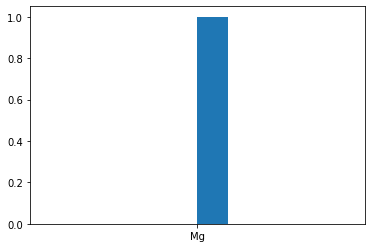

In [ ]:
plt.hist(col)
plt.show()

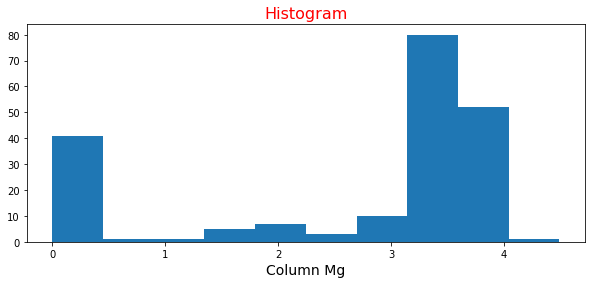

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))

# create all you need
ax.hist(data[col])
ax.set_xlabel("Column "+str(col), fontsize=14)
ax.set_title("Histogram", fontsize=16, color='red')

plt.show()

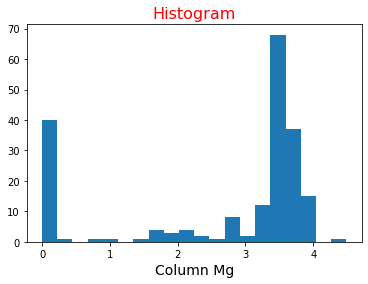

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

# create all you need
ax.hist(data[col], bins=20)
ax.set_xlabel("Column "+str(col), fontsize=14)
ax.set_title("Histogram", fontsize=16, color='red')

plt.show()

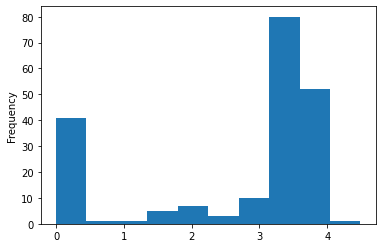

In [ ]:
data[col].plot(kind='hist')
plt.show()

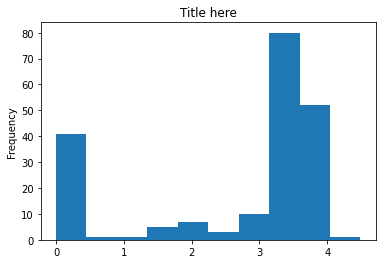

In [ ]:
ax = data[col].plot(kind='hist')
ax.set_title('Title here')
plt.show()

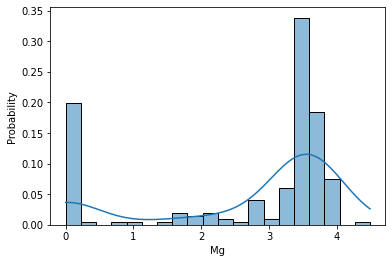

In [ ]:
sns.histplot(data=data, x=col,
             bins=20, 
             kde=True, 
             stat='probability')
plt.show()

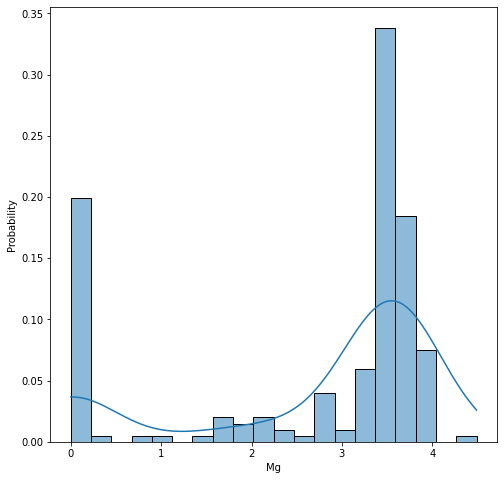

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.histplot(data=data, x=col,
             bins=20, 
             kde=True, 
             stat='probability')
plt.show()

# barplot

In [ ]:
df1 = data['Class'].value_counts()
df1

building_non_float    71
building_float        62
headlamps             28
vehicle_float         16
containers            11
tableware              9
Name: Class, dtype: int64

In [ ]:
df1.index.values

array(['building_non_float', 'building_float', 'headlamps',
       'vehicle_float', 'containers', 'tableware'], dtype=object)

In [ ]:
df1.values

array([71, 62, 28, 16, 11,  9])

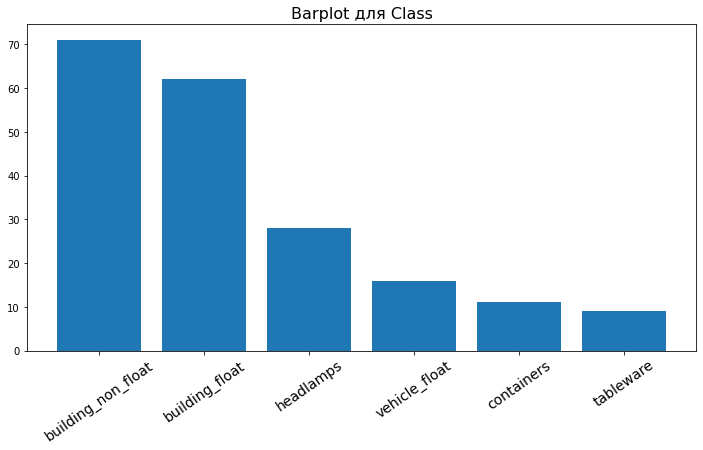

In [ ]:
col='Class'

fig, ax = plt.subplots(figsize=(12,6))

ax.bar(data['Class'].value_counts().index.values,
       data['Class'].value_counts().values)

ax.set_xlabel(None, fontsize=16)
ax.set_title('Barplot для '+str(col), fontsize=16)
ax.tick_params(axis='x', which='major',
               labelsize=14, rotation=35)

plt.show()

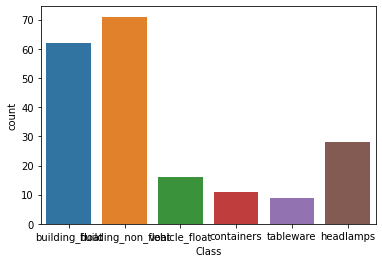

In [ ]:
sns.countplot(x="Class", data=data)

# boxplot

In [ ]:
np.isnan(data['Mg'])

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Name: Mg, Length: 214, dtype: bool

In [ ]:
data1 = data['Mg'][~np.isnan(data['Mg'])]

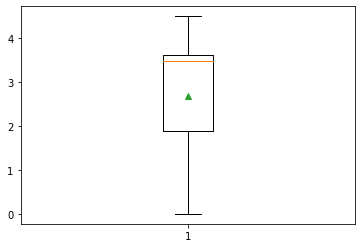

In [ ]:
col = 'Mg'
fig, ax = plt.subplots()
ax.boxplot(data1, showmeans = True)
plt.show()

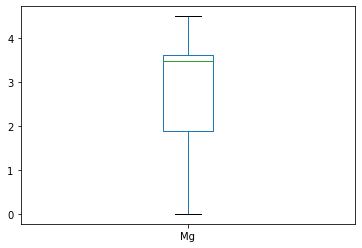

In [ ]:
data[col].plot(kind='box')
plt.show()

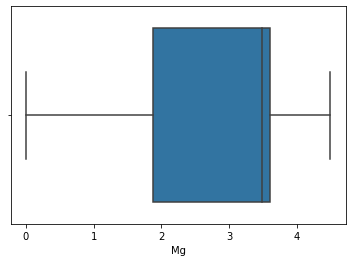

In [ ]:
sns.boxplot(data = data, x=col)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


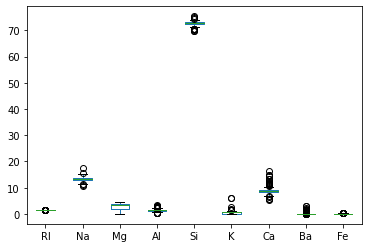

In [ ]:
data.plot(kind = 'box')
plt.show()

In [ ]:
data.columns.values!='Si'

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [ ]:
data.columns.values[data.columns.values!='Si']

array(['RI', 'Na', 'Mg', 'Al', 'K', 'Ca', 'Ba', 'Fe', 'Class'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


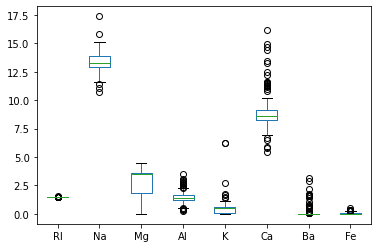

In [ ]:
data[data.columns.values[data.columns.values!='Si']].plot(kind = 'box')
plt.show()

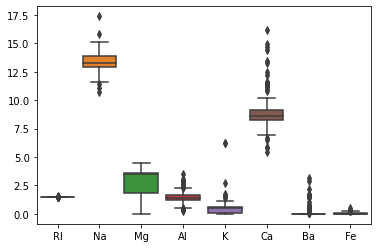

In [ ]:
sns.boxplot(data = data[data.columns.values[data.columns.values!='Si']])
plt.show()

# Scaler

In [ ]:
scaler1 = prepro.MinMaxScaler()

In [ ]:
scaler1 = prepro.MinMaxScaler()
dataScaled1 = scaler1.fit_transform(data[data.columns.values[data.columns.values!='Class']])
dataScaled1 = pd.DataFrame(dataScaled1, columns = data.columns.values[data.columns.values!='Class'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


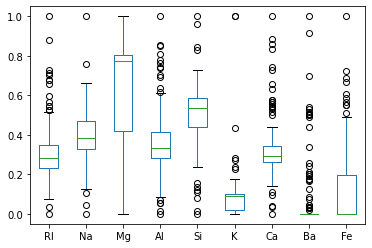

In [ ]:
dataScaled1.plot(kind = 'box')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


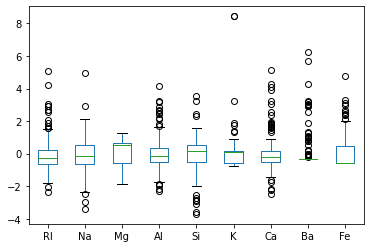

In [ ]:
scaler2 = prepro.StandardScaler()
dataScaled2 = scaler2.fit_transform(data[data.columns.values[data.columns.values!='Class']])
dataScaled2 = pd.DataFrame(dataScaled2, columns = data.columns.values[data.columns.values!='Class'])
dataScaled2.plot(kind = 'box')

# Pair Plot

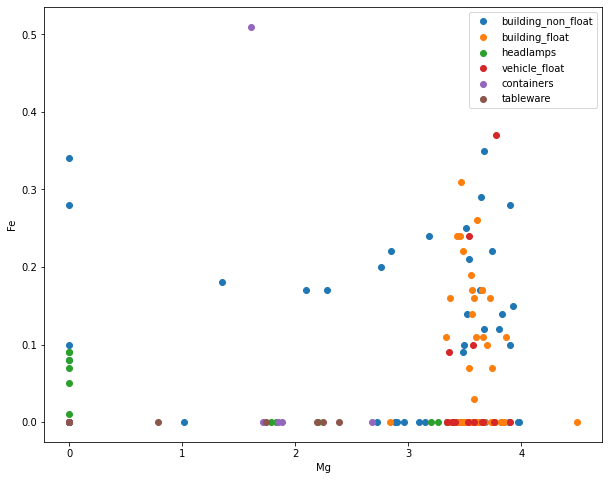

In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(data['Mg'][data['Class'] == glassType],
             data['Fe'][data['Class'] == glassType],
             label = glassType, )

# ax.scatter(data['Mg'], data['Fe'])
ax.set_xlabel('Mg')
ax.set_ylabel('Fe')
ax.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


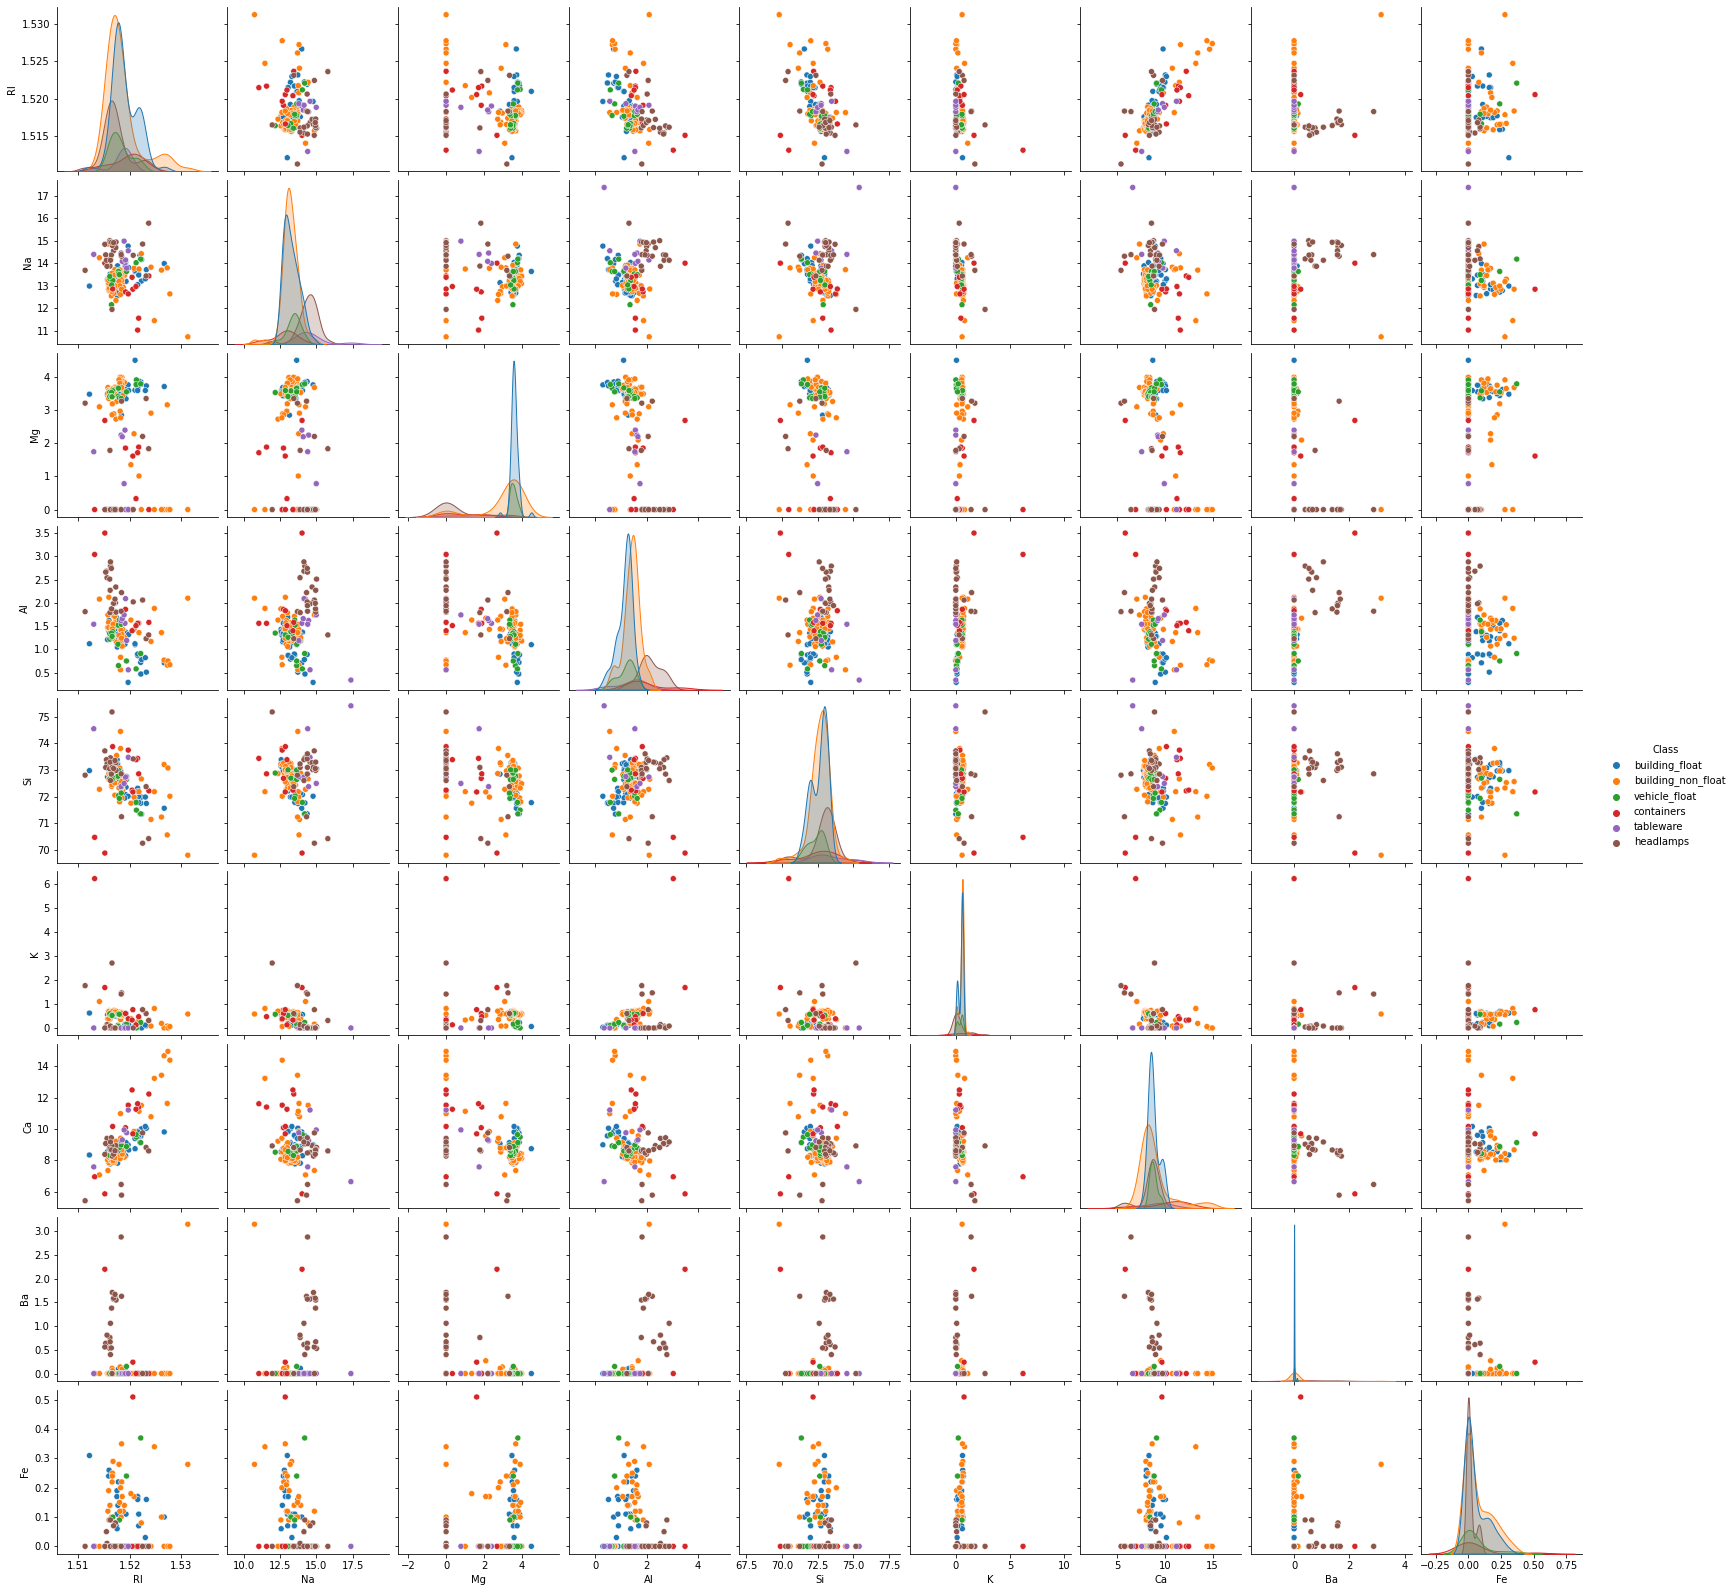

In [ ]:
sns.pairplot(data = data, hue='Class')
plt.show()

# NaN

In [ ]:
data.mean()

RI     1.518459
Na    13.431282
Mg     2.672090
Al     1.435888
Si    72.671371
K      0.502051
Ca     8.926355
Ba     0.157214
Fe     0.055771
dtype: float64

In [ ]:
data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.100000,71.78,0.06,8.75,0.0,0.0,building_float
1,1.51761,13.89,3.60,1.435888,72.73,0.48,7.83,0.0,0.0,building_float
2,1.51618,13.53,3.55,1.435888,72.99,0.39,7.78,0.0,0.0,building_float
3,1.51766,13.21,3.69,1.290000,72.61,0.57,8.22,0.0,0.0,NaN
4,1.51742,13.27,3.62,1.435888,73.08,0.55,8.07,0.0,0.0,NaN


In [ ]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_float
1,1.51761,13.89,3.60,NaN,72.73,0.48,7.83,0.0,0.0,building_float
2,1.51618,13.53,3.55,NaN,72.99,0.39,7.78,0.0,0.0,building_float
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,NaN
4,1.51742,13.27,3.62,NaN,73.08,0.55,8.07,0.0,0.0,NaN


In [ ]:
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   197 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [ ]:
data['Class'].value_counts()

building_non_float    71
building_float        62
headlamps             28
vehicle_float         16
containers            11
tableware              9
Name: Class, dtype: int64

In [ ]:
data['Class'].value_counts().index.values[0]

'building_non_float'

In [ ]:
data['Class'].mode()

0    building_non_float
dtype: object

In [ ]:
data_fillna_mean['Class'].fillna(data['Class'].value_counts().index.values[0], inplace = True)

In [ ]:
# Практика 4, пункт 1
data_fillna_mean = data.fillna(data.mean()).copy()
data['Class'].value_counts().index.values[0]
data['Class'].mode()
data_fillna_mean['Class'].fillna(data['Class'].value_counts().index.values[0], inplace = True)

# PCA

In [ ]:
pca = PCA()
pca.fit(data_fillna_mean[data_fillna_mean.columns[data_fillna_mean.columns.values != 'Class']])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_ratio_*100

array([4.75324251e+01, 2.50804115e+01, 1.09106643e+01, 1.00046317e+01,
       3.90579621e+00, 1.66830780e+00, 7.66206403e-01, 1.31526099e-01,
       3.08113908e-05])

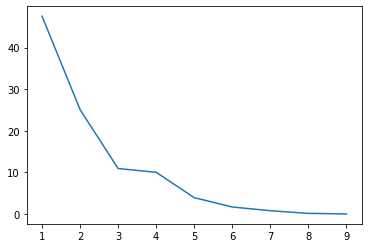

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, 10), pca.explained_variance_ratio_*100)
plt.show()

In [ ]:
rez = pca.transform(data_fillna_mean[data_fillna_mean.columns[data_fillna_mean.columns.values != 'Class']])

In [ ]:
data_pca = pd.DataFrame(rez)
data_pca


,0,1,2,3,4,5,6,7,8
0,-1.461411,-1.125449,-0.129790,-1.013513,0.234986,-0.066368,0.012078,-0.062327,-0.001041
1,-1.397315,0.308583,-0.387432,-0.246846,-0.184085,-0.106043,0.013009,-0.033650,-0.001058
2,-1.395609,0.274514,-0.407732,0.173586,-0.020226,-0.105820,-0.057340,-0.046456,-0.000088
3,-1.252751,-0.239202,0.039933,0.069161,0.016235,0.022242,-0.060312,-0.064521,-0.000047
4,-1.275543,0.003240,-0.229541,0.397557,-0.056779,-0.074731,0.077070,-0.049831,-0.001077
...,...,...,...,...,...,...,...,...,...
209,2.309399,2.071526,0.010092,-0.346156,0.728369,-0.664656,0.273888,-0.019865,0.000934
210,1.849220,2.726902,-0.863093,-0.552722,0.559792,0.346766,0.244180,-0.015257,0.000961
211,2.094276,1.918399,-0.822051,0.180090,-0.129634,-0.422519,-0.430330,0.035955,-0.004445
212,1.891890,2.552443,-0.912962,0.193138,0.649284,0.404417,0.273352,-0.028018,-0.001322


In [ ]:
pcaNames = []
for i in range(9):
  pcaNames.append('pc'+str(i+1))

data_pca.columns = pcaNames
data_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-1.461411,-1.125449,-0.129790,-1.013513,0.234986,-0.066368,0.012078,-0.062327,-0.001041
1,-1.397315,0.308583,-0.387432,-0.246846,-0.184085,-0.106043,0.013009,-0.033650,-0.001058
2,-1.395609,0.274514,-0.407732,0.173586,-0.020226,-0.105820,-0.057340,-0.046456,-0.000088
3,-1.252751,-0.239202,0.039933,0.069161,0.016235,0.022242,-0.060312,-0.064521,-0.000047
4,-1.275543,0.003240,-0.229541,0.397557,-0.056779,-0.074731,0.077070,-0.049831,-0.001077


In [ ]:
data_pca['Class'] = data_fillna_mean['Class'].copy()

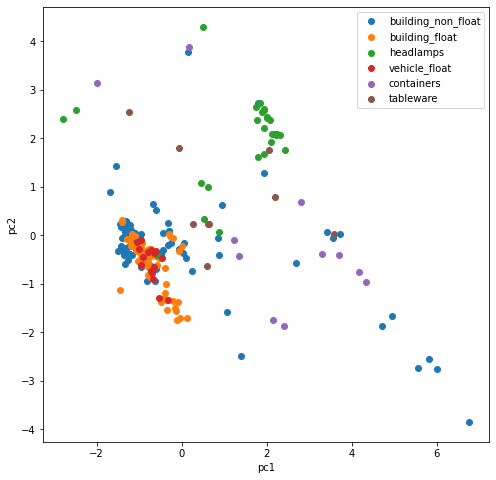

In [ ]:
col1 = 'pc1'
col2 = 'pc2'

fig, ax = plt.subplots(figsize=(8,8))

for glassType in data_pca['Class'].value_counts().index.values:

  ax.scatter(data_pca[col1][ data_pca['Class']==glassType ], 
             data_pca[col2][ data_pca['Class']==glassType ],
             label = glassType)

ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.legend()

plt.show()

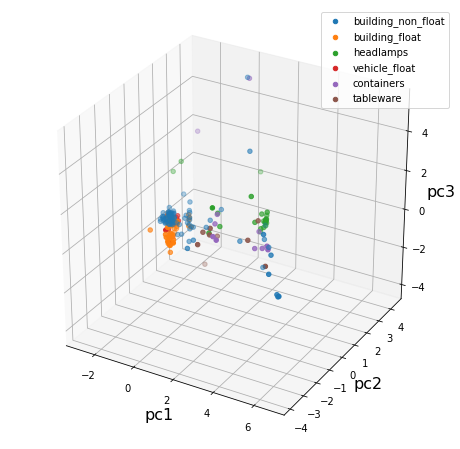

In [ ]:
col1 = 'pc1'
col2 = 'pc2'
col3 = 'pc3'

fig, ax = plt.subplots(figsize=(8,8))
ax = plt.axes(projection='3d')

for glassType in data_pca['Class'].value_counts().index.values:

  ax.scatter(data_pca[col1][ data_pca['Class']==glassType ], 
             data_pca[col2][ data_pca['Class']==glassType ],
             data_pca[col3][ data_pca['Class']==glassType ],
             label = glassType)

ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('pc2', fontsize=16)
ax.set_zlabel('pc3', fontsize=16)
ax.legend()

plt.show()

# Корреляция

In [ ]:
corr = data_fillna_mean.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.074773,-0.177736,-0.395667,-0.450187,-0.218684,0.741772,-0.013998,0.131498
Na,-0.074773,1.000000,-0.252700,0.097371,-0.046984,-0.241230,-0.153366,0.249469,-0.267911
Mg,-0.177736,-0.252700,1.000000,-0.457319,-0.155760,-0.013141,-0.426396,-0.483910,0.067212
Al,-0.395667,0.097371,-0.457319,1.000000,-0.055266,0.347449,-0.295764,0.453021,-0.085038
Si,-0.450187,-0.046984,-0.155760,-0.055266,1.000000,-0.236816,-0.070318,-0.095858,-0.081287
K,-0.218684,-0.241230,-0.013141,0.347449,-0.236816,1.000000,-0.315881,-0.035418,0.014728
Ca,0.741772,-0.153366,-0.426396,-0.295764,-0.070318,-0.315881,1.000000,-0.175394,0.076281
Ba,-0.013998,0.249469,-0.483910,0.453021,-0.095858,-0.035418,-0.175394,1.000000,-0.009781
Fe,0.131498,-0.267911,0.067212,-0.085038,-0.081287,0.014728,0.076281,-0.009781,1.000000


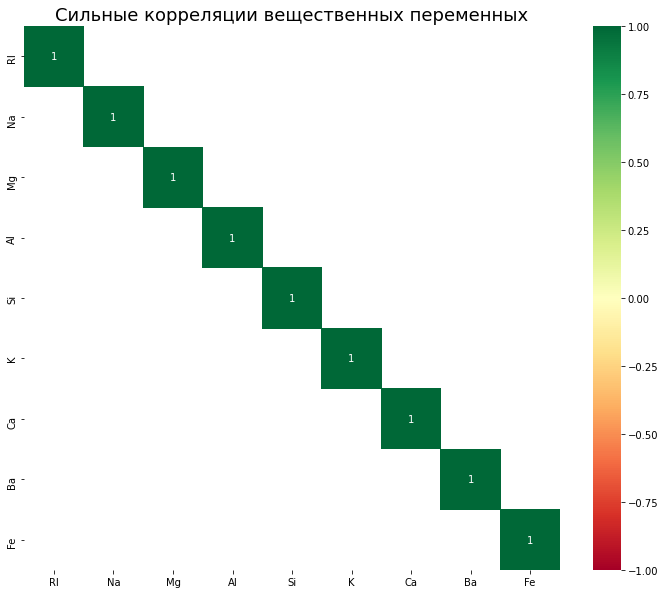

In [ ]:
# Практика 4, пункт 2
plt.figure(figsize=(12, 10))

ax = sns.heatmap(corr[(corr>0.75)|(corr<-0.75)], annot=True, vmax=1, vmin=-1, cmap='RdYlGn')
ax.set_title('Сильные корреляции вещественных переменных', fontsize=18)

plt.show()

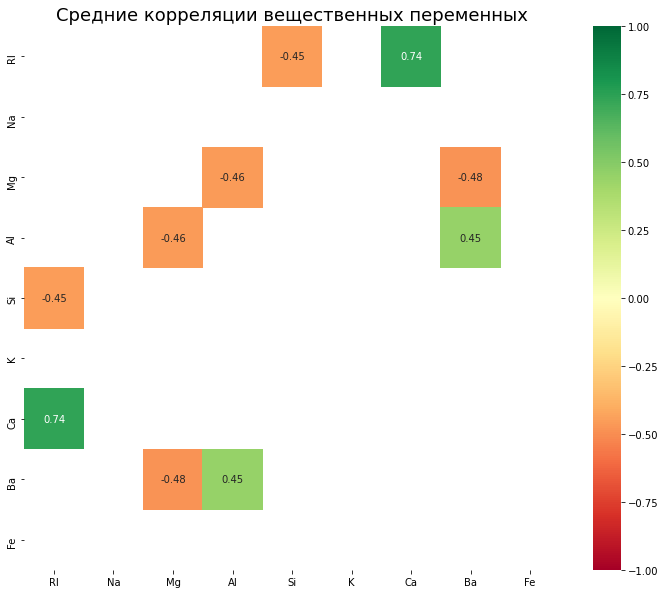

In [ ]:
plt.figure(figsize=(12, 10))

ax = sns.heatmap(corr[((corr>0.45)&(corr<0.75))|((corr>-0.75)&(corr<-0.45))], annot=True, vmax=1, vmin=-1, cmap='RdYlGn')
ax.set_title('Средние корреляции вещественных переменных', fontsize=18)

plt.show()

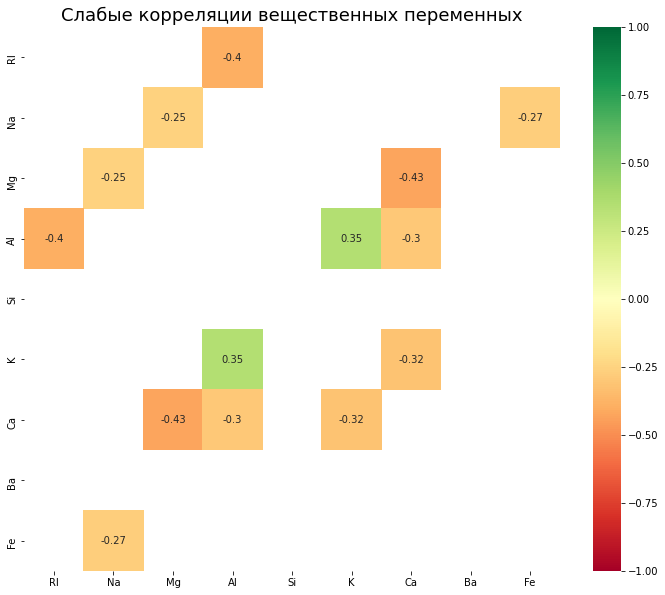

In [ ]:
plt.figure(figsize=(12, 10))

ax = sns.heatmap(corr[((corr>0.25)&(corr<0.45))|((corr>-0.45)&(corr<-0.25))], annot=True, vmax=1, vmin=-1, cmap='RdYlGn')
ax.set_title('Слабые корреляции вещественных переменных', fontsize=18)

plt.show()

In [ ]:
corr[corr>0.75]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Na,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mg,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Al,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Si,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
K,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Ca,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


# Feature importance

In [ ]:
forest = ExtraTreesClassifier(n_estimators=100)

In [ ]:
forest.fit(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values!='Class']], data_fillna_mean['Class'])

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
forest.feature_importances_

array([0.13679337, 0.11213965, 0.1750687 , 0.11456285, 0.09140419,
       0.0951426 , 0.13800642, 0.07106671, 0.0658155 ])

In [ ]:
np.sort(forest.feature_importances_)[::-1]

array([0.1750687 , 0.13800642, 0.13679337, 0.11456285, 0.11213965,
       0.0951426 , 0.09140419, 0.07106671, 0.0658155 ])

In [ ]:
np.argsort(forest.feature_importances_)

array([8, 7, 4, 5, 1, 3, 0, 6, 2])

In [ ]:
indices = np.argsort(forest.feature_importances_)[::-1]

In [ ]:
print("Feature ranking:")
for f in range(9):
  print("%d. feature %s (%f)" % (f+1, data_fillna_mean.columns.values[indices[f]], forest.feature_importances_[indices[f]]))

Feature ranking:
1. feature Mg (0.175069)
2. feature Ca (0.138006)
3. feature RI (0.136793)
4. feature Al (0.114563)
5. feature Na (0.112140)
6. feature K (0.095143)
7. feature Si (0.091404)
8. feature Ba (0.071067)
9. feature Fe (0.065816)


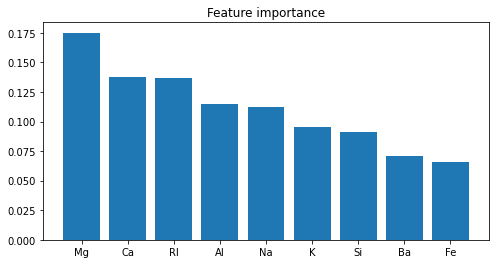

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))

ax.set_title("Feature importance")
ax.bar(data_fillna_mean.columns.values[indices], forest.feature_importances_[indices])

plt.show()

In [ ]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

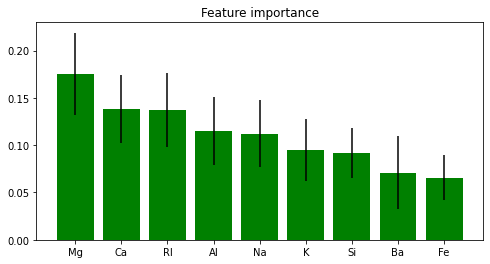

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))

ax.set_title("Feature importance")
ax.bar(data_fillna_mean.columns.values[indices], forest.feature_importances_[indices], color="g", yerr=std[indices], align="center")

plt.show()

# Практика 2

In [ ]:
data_button = widg.Button(description = 'Show info')
data_out = widg.Output()

display(data_button, data_out)

def on_click_data(b):
  with data_out:
    data_out.clear_output()
    data1.info()

data_button.on_click(on_click_data)

data_button2 = widg.Button(description = 'Show data describe')
data_out2 = widg.Output()

display(data_button2, data_out2)

def on_click_data2(b):
  with data_out:
    data_out.clear_output()
    print(data1.describe())

data_button2.on_click(on_click_data2)

Button(description='Show info', style=ButtonStyle())

Output()

Button(description='Show data describe', style=ButtonStyle())

Output()

# Практика 3

## Пункт №1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

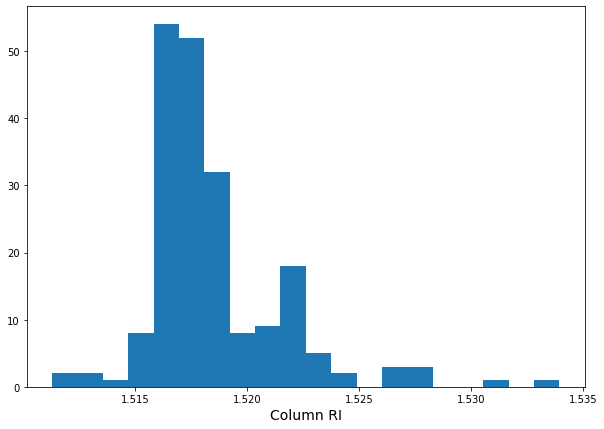

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

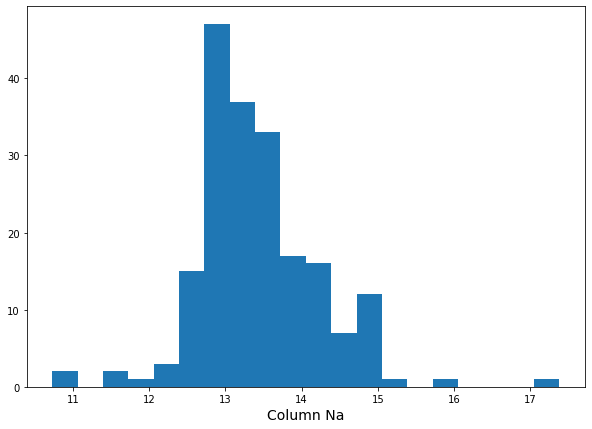

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

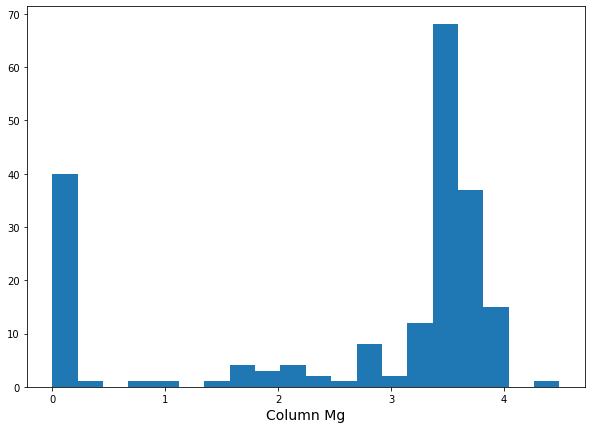

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

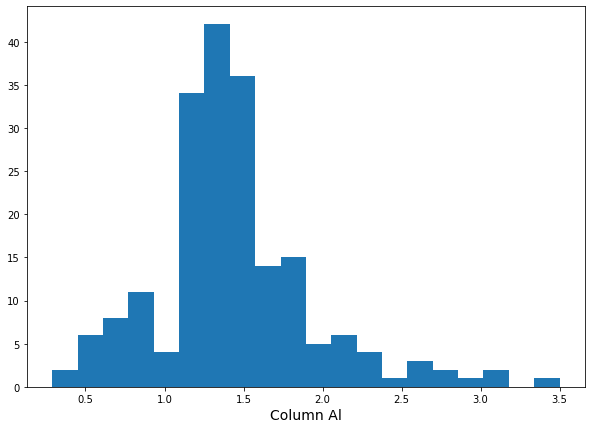

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

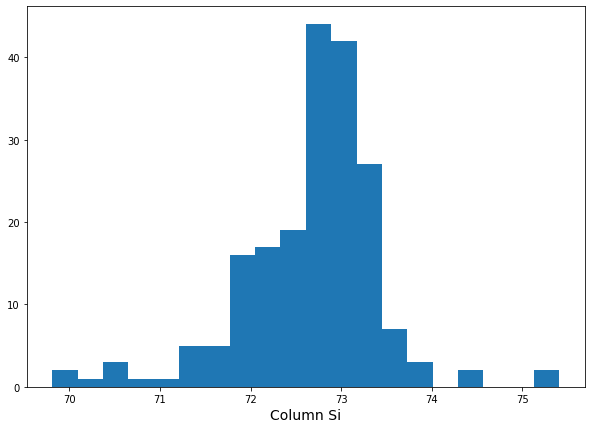

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

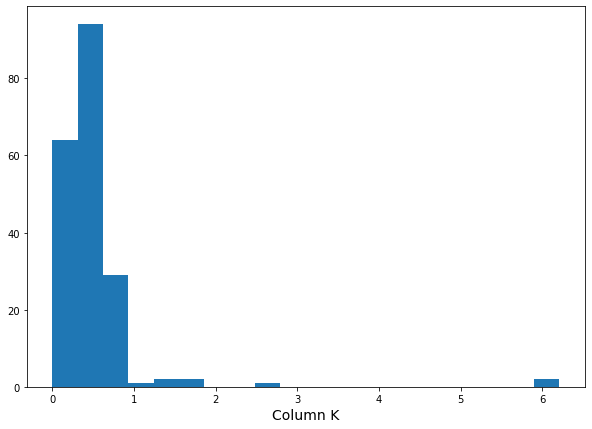

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

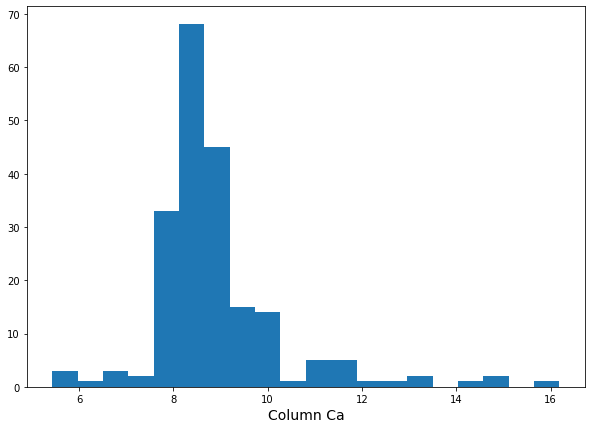

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

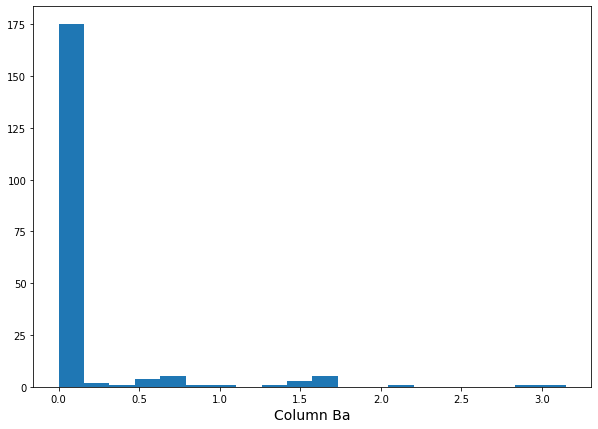

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

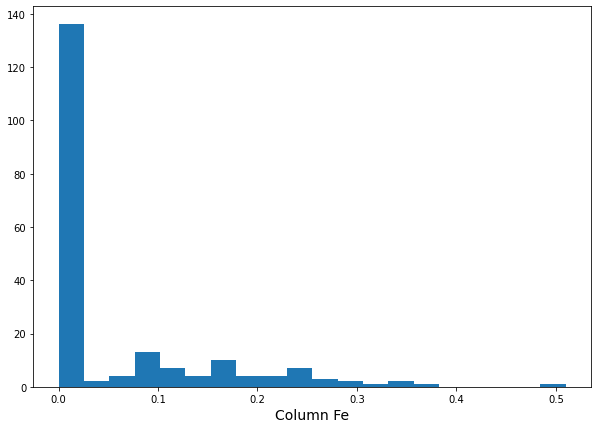

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

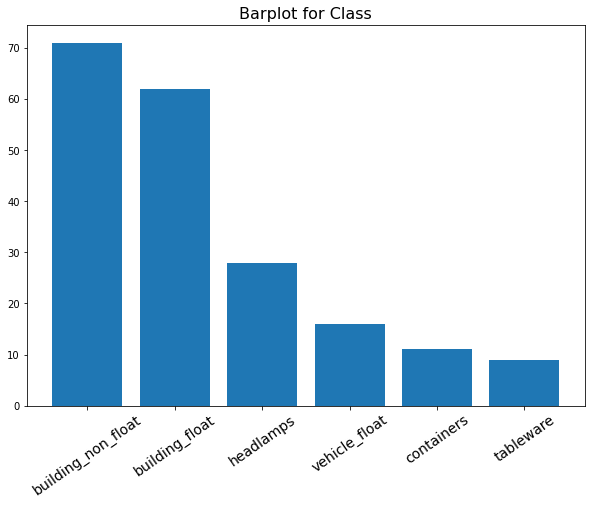

<IPython.core.display.Javascript object>

In [ ]:
#@title
columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class']

tb = widgets.TabBar(columns, location='top')

def create_tub(ColName):
  with tb.output_to(str(ColName)):
    fig2, ax2 = plt.subplots(figsize=(10,7))
    if  ColName != 'Class':
      ax2.hist(data[ColName], bins=20)
      ax2.set_xlabel('Column ' + str(ColName), fontsize = 14)
    else:
      ax2.bar(data[ColName].value_counts().index.values, data[ColName].value_counts().values)
      ax2.set_xlabel(None, fontsize = 16 )
      ax2.set_title('Barplot for '+str(ColName), fontsize=16)
      ax2.tick_params(axis='x', which='major', labelsize=14, rotation=35)

    
for n in columns:
  create_tub(n)

## Пункт №2

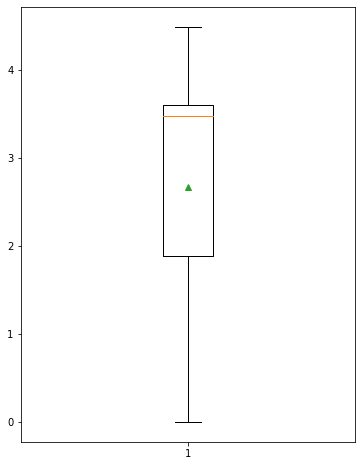

In [ ]:
#@title {run: "auto"}
Column_Name = "Mg" #@param ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"] 

fig3, ax3 = plt.subplots(figsize = (6, 8))

ax3.boxplot(data[str(Column_Name)][~np.isnan(data[str(Column_Name)])], showmeans=True)

plt.show()

## Пункт №3

In [ ]:
#@title {run: "auto"}
Variable1 = "Si" #@param ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]
Variable2 = "Ca" #@param ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]

pairButton = widg.Button(description="Show Pair Plot")
pairOutput = widg.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with pairOutput:
    fig, ax = plt.subplots(figsize = (10, 8))

    for glassType in data['Class'].value_counts().index.values:
      ax.scatter(data[Variable1][data['Class'] == glassType],
                data[Variable2][data['Class'] == glassType],
                label = glassType)

    # ax.scatter(data['Mg'], data['Fe'])
    ax.set_xlabel(Variable1)
    ax.set_ylabel(Variable2)
    ax.legend()

    plt.show()

pairButton.on_click(on_button_clicked)
display(pairButton, pairOutput)


Button(description='Show Pair Plot', style=ButtonStyle())

Output()